In [1]:
class Profiler:
    def __enter__(self):
        import cProfile
        self.pr = cProfile.Profile()
        self.pr.enable()
        
    def __exit__(self, exc_type, exc_value, exc_traceback):
        import pstats, io
        self.pr.disable()
        s = io.StringIO()
        sortby = "cumulative"
        ps = pstats.Stats(self.pr, stream=s).sort_stats(sortby)
        ps.print_stats()
        print(s.getvalue())

In [2]:
# imports
import numpy as np
import seaborn as sns
import tqdm
import random
import matplotlib.pyplot as plt
import os
import pandas as pd
from numpy.random import choice
from scipy import stats
from collections import Counter
from model import AbstractCell, Action, Brain, Submodels
from modelrgpn import BrainLI
from experiment import Experiment
from utils import nop, highest_lower, Profiler, plot_function
from submodels.cellbasic1 import CellBasic
from submodels.bistate1 import BiStateModelFactory
from submodels.bistate_LI import BiStateLIModelFactory
from submodels.tristate_LI import TriStateLIModelFactory
from submodels import factories
from biodata import *
from tree import tree_from_cell

## Model

In [3]:
smooth = 0.2
start_val = 0.35
bias_ratio = [0.2, 0.2, -0.1, -0.1, -0.1]
size = 6
NAME = "none"
DESC = f"bias {bias_ratio} size {size} startval {start_val} smooth {smooth}"

In [4]:
# Definition of the var of the model
# We start with 100 cells for homogeneity
START_POPULATION_SQRT = 10
START_TIME = 49
END_TIME = 70
# We arbitrarily set variance of Tc at 12.5^2
# 95 % seems to be into 50, so sigma = 50 / 4 = 12.5
SIG_TC = 12.5

In [5]:
def go(seed=0):
    random.seed(0+seed)
    np.random.seed(0+seed)
    ccls = TriStateLIModelFactory(tc_coeff_RG=[1., 1., 1., 1., 1.], smooth=smooth, start_val=start_val,
                                bias_ratio=bias_ratio)
    bb = BrainLI(time_step=0.5, verbose=False, start_population=size, cell_cls=ccls.generate, check=False,
                end_time=94, callback_gpn=None)
    bb.gpn.debug = True

    # bb.run()
    return bb

In [6]:
bb = go(0)
bb.run()

Ticking abs : 49.0, step : 0.5
Ticking abs : 49.5, step : 0.5
Calling _duplicate_node  with  (12,) {}
Calling build_new_edge  with  (12, 13, 10) {}
Action for gpn _make_edge  with  (10, (12, 13)) {}
Calling build_new_edge  with  (12, 19, 10) {}
Action for gpn _make_edge  with  (10, (12, 19)) {}
Calling build_new_edge  with  (36, 19, 10) {}
Action for gpn _make_edge  with  (10, (36, 19)) {}
Calling build_new_edge  with  (18, 13, 10) {}
Action for gpn _make_edge  with  (10, (18, 13)) {}
Action for gpn _remove_edge  with  ((7, 13),) {}
Action for gpn _make_edge  with  (6, (7, 36)) {}
Calling build_new_edge  with  (6, 13, 5) {}
Action for gpn _make_edge  with  (5, (6, 13)) {}
Action for gpn _remove_edge  with  ((7, 13),) {}
Action for gpn _make_edge  with  (6, (7, 14)) {}
Calling build_new_edge  with  (30, 25, 20) {}
Action for gpn _make_edge  with  (20, (30, 25)) {}
Calling _duplicate_node  with  (16,) {}
Calling build_new_edge  with  (16, 15, 8) {}
Action for gpn _make_edge  with  (8, (1

Calling build_new_edge  with  (39, 44, -1) {}
Action for gpn _make_border_edge  with  (18, (39, 44)) {}
Calling build_new_edge  with  (44, 39, -1) {}
Action for gpn _make_border_edge  with  (18, (44, 39)) {}
Calling build_new_edge  with  (19, 13, 10) {}
Action for gpn _make_edge  with  (10, (19, 13)) {}
Action for gpn _remove_edge  with  ((40, 13),) {}
Action for gpn _make_edge  with  (11, (14, 19)) {}
Action for gpn _make_edge  with  (27, (8, 36)) {}
Action for gpn _remove_edge  with  ((8, 14),) {}
Action for gpn _make_edge  with  (7, (8, 15)) {}
Calling _duplicate_node  with  (30,) {}
Calling build_new_edge  with  (39, 44, -1) {}
Action for gpn _make_border_edge  with  (18, (39, 44)) {}
Calling build_new_edge  with  (44, 39, -1) {}
Action for gpn _make_border_edge  with  (18, (44, 39)) {}
Calling build_new_edge  with  (19, 13, 10) {}
Action for gpn _make_edge  with  (10, (19, 13)) {}
Action for gpn _remove_edge  with  ((40, 13),) {}
Action for gpn _make_edge  with  (11, (14, 40)) {}


Action for gpn _remove_edge  with  ((43, 28),) {}
Action for gpn _remove_edge  with  ((27, 45),) {}
Action for gpn _make_edge  with  (19, (27, 29)) {}
Calling setup_edge  with  ((43, 22), 58, 37) {}
Action for gpn _make_edge  with  (58, (43, 37)) {}
Action for gpn _make_edge  with  (64, (22, 37)) {}
Action for gpn _remove_edge  with  ((43, 22),) {}
Action for gpn _remove_edge  with  ((20, 37),) {}
Action for gpn _make_edge  with  (64, (22, 43)) {}
Action for gpn _make_edge  with  (40, (10, 23)) {}
Action for gpn _remove_edge  with  ((37, 43),) {}
Action for gpn _make_edge  with  (64, (27, 43)) {}
Action for gpn _remove_edge  with  ((27, 22),) {}
Calling setup_edge  with  ((38, 10), 40, 37) {}
Action for gpn _make_edge  with  (40, (38, 37)) {}
Action for gpn _make_edge  with  (40, (10, 37)) {}
Action for gpn _remove_edge  with  ((38, 10),) {}
Action for gpn _remove_edge  with  ((20, 37),) {}
Action for gpn _make_edge  with  (58, (23, 50)) {}
Calling setup_edge  with  ((24, 46), 30, 25) 

Action for gpn _remove_edge  with  ((42, 22),) {}
Action for gpn _remove_edge  with  ((22, 29),) {}
Action for gpn _make_edge  with  (80, (22, 29)) {}
Calling build_new_edge  with  (20, 22, 79) {}
Action for gpn _make_edge  with  (79, (20, 22)) {}
Action for gpn _remove_edge  with  ((42, 22),) {}
Action for gpn _remove_edge  with  ((22, 29),) {}
Action for gpn _make_edge  with  (80, (22, 29)) {}
Calling build_new_edge  with  (19, 14, 73) {}
Action for gpn _make_edge  with  (73, (19, 14)) {}
Action for gpn _remove_edge  with  ((19, 14),) {}
Action for gpn _make_edge  with  (59, (13, 15)) {}
Calling build_new_edge  with  (20, 22, 79) {}
Action for gpn _make_edge  with  (79, (20, 22)) {}
Action for gpn _remove_edge  with  ((42, 22),) {}
Action for gpn _remove_edge  with  ((22, 29),) {}
Action for gpn _make_edge  with  (80, (27, 29)) {}
Calling build_new_edge  with  (20, 22, 79) {}
Action for gpn _make_edge  with  (79, (20, 22)) {}
Action for gpn _remove_edge  with  ((42, 22),) {}
Action f

Calling setup_edge  with  ((28, 34), 95, 35) {}
Action for gpn _make_edge  with  (95, (34, 35)) {}
Action for gpn _remove_edge  with  ((28, 34),) {}
Calling setup_edge  with  ((29, 43), 86, 22) {}
Action for gpn _make_edge  with  (86, (29, 22)) {}
Action for gpn _remove_edge  with  ((29, 43),) {}
Action for gpn _remove_edge  with  ((10, 22),) {}
Action for gpn _make_edge  with  (9, (43, 50)) {}
Action for gpn _make_edge  with  (29, (20, 27)) {}
Calling setup_edge  with  ((29, 45), 19, 28) {}
Action for gpn _remove_edge  with  ((29, 45),) {}
Calling _destroy_node  with  (43,) {}
Action for gpn _create_edge  with  (29, 11) {'ref_dual_node': -1, 'ref_node': 43}
Action for gpn _make_border_edge  with  (43, (29, 11)) {}
Action for gpn _create_edge  with  (22, 29) {'ref_dual_node': 86, 'ref_node': 43}
Action for gpn _make_edge  with  (86, (22, 29)) {}
Action for gpn _remove_node  with  (43,) {}
Action for gpn _remove_edge  with  ((22, 29),) {}
Action for gpn _make_edge  with  (99, (11, 22)) 

Calling build_new_edge  with  (59, 48, 48) {}
Action for gpn _make_edge  with  (48, (59, 48)) {}
Calling build_new_edge  with  (59, 14, 59) {}
Action for gpn _make_edge  with  (59, (59, 14)) {}
Action for gpn _remove_edge  with  ((14, 41),) {}
Action for gpn _make_edge  with  (100, (20, 39)) {}
Action for gpn _make_edge  with  (29, (27, 41)) {}
Calling build_new_edge  with  (59, 12, 118) {}
Action for gpn _make_edge  with  (118, (59, 12)) {}
Action for gpn _remove_edge  with  ((12, 36),) {}
Action for gpn _make_edge  with  (115, (12, 36)) {}
Action for gpn _remove_edge  with  ((59, 12),) {}
Action for gpn _remove_edge  with  ((2, 56),) {}
Action for gpn _make_edge  with  (115, (2, 56)) {}
Calling build_new_edge  with  (59, 50, 59) {}
Action for gpn _make_edge  with  (59, (59, 50)) {}
Calling _duplicate_node  with  (22,) {}
Calling build_new_edge  with  (59, 14, 59) {}
Action for gpn _make_edge  with  (59, (59, 14)) {}
Action for gpn _remove_edge  with  ((14, 41),) {}
Action for gpn _ma

Action for gpn _remove_edge  with  ((14, 41),) {}
Action for gpn _make_edge  with  (100, (18, 20)) {}
Action for gpn _make_edge  with  (29, (27, 41)) {}
Action for gpn _remove_edge  with  ((41, 52),) {}
Action for gpn _make_edge  with  (11, (19, 52)) {}
Action for gpn _remove_edge  with  ((52, 25),) {}
Calling setup_edge  with  ((46, 24), 30, 52) {}
Action for gpn _remove_edge  with  ((46, 24),) {}
Action for gpn _remove_edge  with  ((14, 41),) {}
Action for gpn _make_edge  with  (100, (18, 20)) {}
Action for gpn _make_edge  with  (29, (20, 27)) {}
Action for gpn _remove_edge  with  ((41, 52),) {}
Action for gpn _make_edge  with  (11, (24, 41)) {}
Action for gpn _remove_edge  with  ((52, 25),) {}
Calling setup_edge  with  ((24, 52), 11, 41) {}
Action for gpn _make_edge  with  (11, (24, 41)) {}
Action for gpn _remove_edge  with  ((24, 52),) {}
Action for gpn _remove_edge  with  ((14, 41),) {}
Action for gpn _make_edge  with  (100, (20, 39)) {}
Action for gpn _make_edge  with  (29, (20, 

Calling build_new_edge  with  (61, 62, 19) {}
Action for gpn _make_edge  with  (19, (61, 62)) {}
Calling build_new_edge  with  (61, 64, 96) {}
Action for gpn _make_edge  with  (96, (61, 64)) {}
Calling replace_edge  with  ((64, 45), (61, 54)) {}
Action for gpn _remove_edge  with  ((64, 45),) {}
Action for gpn _make_edge  with  (88, (61, 54)) {}
Action for gpn _make_edge  with  (88, (45, 61)) {}
Action for gpn _remove_edge  with  ((61, 54),) {}
Action for gpn _make_edge  with  (88, (32, 45)) {}
Calling _duplicate_node  with  (7,) {}
Calling build_new_edge  with  (70, 58, 0) {}
Action for gpn _make_edge  with  (0, (70, 58)) {}
Calling build_new_edge  with  (70, 0, 0) {}
Action for gpn _make_edge  with  (0, (70, 0)) {}
Calling replace_edge  with  ((2, 56), (55, 36)) {}
Action for gpn _remove_edge  with  ((2, 56),) {}
Action for gpn _make_edge  with  (115, (55, 36)) {}
Calling replace_edge  with  ((2, 36), (6, 56)) {}
Action for gpn _remove_edge  with  ((2, 36),) {}
Action for gpn _make_ed

Calling setup_edge  with  ((64, 45), 96, 61) {}
Action for gpn _make_edge  with  (96, (64, 61)) {}
Action for gpn _make_edge  with  (156, (45, 61)) {}
Action for gpn _remove_edge  with  ((64, 45),) {}
Action for gpn _remove_edge  with  ((62, 61),) {}
Action for gpn _make_edge  with  (88, (32, 45)) {}
Calling setup_edge  with  ((72, 60), 99, 10) {}
Action for gpn _make_edge  with  (99, (72, 10)) {}
Action for gpn _remove_edge  with  ((72, 60),) {}
Calling setup_edge  with  ((64, 45), 88, 33) {}
Action for gpn _make_edge  with  (88, (64, 33)) {}
Action for gpn _make_edge  with  (88, (45, 33)) {}
Action for gpn _remove_edge  with  ((64, 45),) {}
Action for gpn _remove_edge  with  ((64, 33),) {}
Calling setup_edge  with  ((60, 72), 99, 10) {}
Action for gpn _make_edge  with  (99, (72, 10)) {}
Action for gpn _remove_edge  with  ((60, 72),) {}
Calling setup_edge  with  ((60, 10), 99, 72) {}
Action for gpn _make_edge  with  (99, (10, 72)) {}
Action for gpn _remove_edge  with  ((60, 10),) {}
A

Calling setup_edge  with  ((39, 14), 59, 12) {}
Action for gpn _make_edge  with  (59, (14, 12)) {}
Action for gpn _remove_edge  with  ((39, 14),) {}
Calling setup_edge  with  ((41, 14), 59, 39) {}
Action for gpn _make_edge  with  (59, (14, 39)) {}
Action for gpn _remove_edge  with  ((41, 14),) {}
Calling setup_edge  with  ((41, 39), 59, 14) {}
Action for gpn _make_edge  with  (59, (39, 14)) {}
Action for gpn _remove_edge  with  ((41, 39),) {}
Calling setup_edge  with  ((41, 39), 59, 50) {}
Action for gpn _make_edge  with  (59, (41, 50)) {}
Action for gpn _remove_edge  with  ((41, 39),) {}
Action for gpn _remove_edge  with  ((50, 39),) {}
Action for gpn _make_edge  with  (174, (12, 41)) {}
Calling _duplicate_node  with  (51,) {}
Calling setup_edge  with  ((39, 41), 59, 14) {}
Action for gpn _make_edge  with  (59, (39, 14)) {}
Action for gpn _remove_edge  with  ((39, 41),) {}
Calling setup_edge  with  ((41, 14), 59, 39) {}
Action for gpn _make_edge  with  (59, (14, 39)) {}
Action for gpn

Calling setup_edge  with  ((32, 54), 75, 26) {}
Action for gpn _make_edge  with  (75, (54, 26)) {}
Action for gpn _remove_edge  with  ((32, 54),) {}
Action for gpn _remove_edge  with  ((53, 26),) {}
Action for gpn _make_edge  with  (34, (52, 76)) {}
Action for gpn _make_edge  with  (171, (32, 66)) {}
Calling setup_edge  with  ((32, 33), 167, 77) {}
Action for gpn _remove_edge  with  ((32, 33),) {}
Calling setup_edge  with  ((32, 26), 75, 54) {}
Action for gpn _make_edge  with  (75, (26, 54)) {}
Action for gpn _remove_edge  with  ((32, 26),) {}
Calling _destroy_node  with  (66,) {}
Action for gpn _create_edge  with  (61, 62) {'ref_dual_node': 19, 'ref_node': 66}
Action for gpn _make_edge  with  (19, (61, 62)) {}
Action for gpn _create_edge  with  (62, 27) {'ref_dual_node': 159, 'ref_node': 66}
Action for gpn _make_edge  with  (159, (62, 27)) {}
Action for gpn _create_edge  with  (27, 33) {'ref_dual_node': 171, 'ref_node': 66}
Action for gpn _make_edge  with  (171, (27, 33)) {}
Action fo

KeyboardInterrupt: 

In [ ]:
raise

In [ ]:
NAME = "tuning_2"
DESC = "bias 0.3, 0.2, 0, 0, 0 size 8 startval 0.4 smooth 0.0"

In [ ]:
seed = 0
while True:
    print("Doing", seed)
    try:
        bb = go(seed)
    except:
        seed += 1
    else:
        break

In [ ]:
def plot_size(stats, name=None):
    ref = stats.whole_pop_size.iloc[0]
    plt.figure(figsize=(12, 8))
    plot_number_cells()
    p1 = plt.plot(stats.time, stats.progenitor_pop_size / ref, label="Progenitor population")
    # p2 = plt.plot(stats.time, stats.whole_pop_size / ref, label="Whole Population")
    plt.legend()
    if name:
        plt.savefig(f"output/results/prog_size_{name}.png")
    
def plot_ratio(stats, name=None):
    plt.figure(figsize=(12, 8))
    plt.plot(stats.time, stats.size_type_IP / (stats.size_type_RG + stats.size_type_IP),
             label="IP ratio")
    plt.plot(ratio_eomes.index, ratio_eomes.val / 100, label="Reference IP ratio")
    plt.legend()
    if name:
        plt.savefig(f"output/results/IP_ratio_{name}.png")
        
def save_stats(stats, name):
    stats.to_csv(f"output/results/stats_{name}.csv")
    
def save_txt(txt, name):
    fn = f"output/results/txt_{name}.txt"
    with open(fn, "w") as f:
        f.write(txt)

In [ ]:
plot_size(bb.stats, NAME)

In [ ]:
plot_ratio(bb.stats, NAME)

In [ ]:
save_stats(bb.stats, NAME)
save_txt(DESC, NAME)

In [ ]:
bb.stats

In [ ]:
bb.gpn_population

In [11]:
def cell_from_gpn_id(bb, gpn_id):
    return bb.population[bb.gpn_population[gpn_id]]

def cell_name_from_gpn_id(bb, gpn_id):
    return cell_from_gpn_id(bb, gpn_id).type().name

def var_metric(bb, count_itself=False):
    def cell_from_gpn_id(gpn_id):
        return bb.population[bb.gpn_population[gpn_id]]
    
    ls_ratio = list()
    for gpn_id, cell_id in bb.gpn_population.items():
        ngbs = bb.gpn.ngb(gpn_id)
        ls = [cell_from_gpn_id(ngb).type().name == "IP" for ngb in ngbs]
        if count_itself:
            ls.append(cell_from_gpn_id(gpn_id).type().name == "IP")
        ratio = np.mean(ls)
        ls_ratio.append(ratio)
    return ls_ratio

def var_metric_random(bb, count_itself=False):
    # randomize values
    is_IP = [bb.population[cid].type().name == "IP" for
             cid in bb.gpn_population.values()]
    random.shuffle(is_IP)
    
    fake_dict = {gpn_id: val for gpn_id, val in zip(bb.gpn_population.keys(), is_IP)}
    
    ls_ratio = list()
    for gpn_id, cell_id in bb.gpn_population.items():
        ngbs = bb.gpn.ngb(gpn_id)
        ls = [fake_dict[ngb] for ngb in ngbs]
        if count_itself:
            ls.append(fake_dict[gpn_id])
        ratio = np.mean(ls)
        ls_ratio.append(ratio)
    return ls_ratio

def mean_delta_metric(bb):
    def cell_from_gpn_id(gpn_id):
        return bb.population[bb.gpn_population[gpn_id]]
    
    ls_ratio_pos, ls_ratio_neg = list(), list()
    for gpn_id, cell_id in bb.gpn_population.items():
        ngbs = bb.gpn.ngb(gpn_id)
        ls = [cell_from_gpn_id(ngb).type().name == "IP" for ngb in ngbs]
        ratio = np.mean(ls)
        if cell_from_gpn_id(gpn_id).type().name == "IP":
            ls_ratio_pos.append(ratio)
        else:
            ls_ratio_neg.append(ratio)
    return ls_ratio_pos, ls_ratio_neg

def mean_delta_metric_random(bb):
    # randomize values
    is_IP = [bb.population[cid].type().name == "IP" for
             cid in bb.gpn_population.values()]
    random.shuffle(is_IP)
    
    fake_dict = {gpn_id: val for gpn_id, val in zip(bb.gpn_population.keys(), is_IP)}
    
    ls_ratio_pos, ls_ratio_neg = list(), list()
    for gpn_id, cell_id in bb.gpn_population.items():
        ngbs = bb.gpn.ngb(gpn_id)
        ls = [fake_dict[ngb] for ngb in ngbs]
        ratio = np.mean(ls)
        if fake_dict[gpn_id]:
            ls_ratio_pos.append(ratio)
        else:
            ls_ratio_neg.append(ratio)
    return ls_ratio_pos, ls_ratio_neg

In [ ]:
ls_ratio = var_metric(bb)
ls_random = var_metric_random(bb)
np.var(ls_ratio), np.mean(ls_ratio), np.var(ls_random), np.mean(ls_random)

In [ ]:
ls_ratio = var_metric(bb, count_itself=True)
ls_random = var_metric_random(bb, count_itself=True)
np.var(ls_ratio), np.mean(ls_ratio), np.var(ls_random), np.mean(ls_random)

In [ ]:
ls_pos, ls_neg = mean_delta_metric(bb)
np.mean(ls_pos), np.mean(ls_neg)

In [ ]:
ls_pos, ls_neg = mean_delta_metric_random(bb)
np.mean(ls_pos), np.mean(ls_neg)

## Plotting some ego networks

In [9]:
import networkx as nx

def draw_random_ego_net(bb, radius=2):
    eg = nx.ego_graph(bb.gpn.G, random.sample(bb.gpn.G.nodes, 1)[0], radius)
    # get colors
    nodes = list(eg.nodes)
    dict_color = {"IP": "g", "RG": "y", "GP": "b", "PostMitotic": "r"}
    colors = [dict_color[cell_name_from_gpn_id(bb, gpn_id)] for gpn_id in nodes]
    nx.draw(eg, nodelist=nodes, node_color=colors)

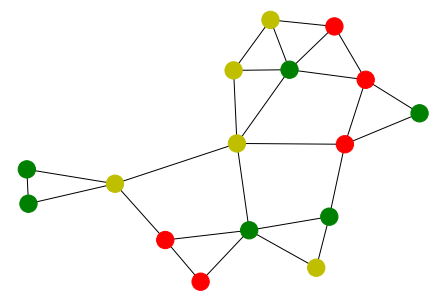

In [17]:
draw_random_ego_net(bb)

In [ ]:
len(bb.gpn.G)